In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Data Loading

In [23]:
data = pd.read_csv('result_text.csv')

In [24]:
data['Social Community Influence']

KeyError: 'Social Community Influence'

Social Analysis

### Quick Summary 
The analysis reveals a consistent positive correlation between the influence of social community aspects and user engagement in health apps. Users who prioritize maintaining a healthy lifestyle or frequently use health tracking apps are more likely to be influenced by social factors such as peer pressure, group challenges, and community involvement. This indicates that social interaction is a crucial driver of app engagement, particularly for those who value their health highly.

Strategic insights suggest that enhancing social community features—such as friend activity sharing, group challenges, and community events—could significantly boost app usage, especially among users already somewhat influenced by these aspects. For users who are less motivated by social factors, alternative strategies, like personalized content or tangible rewards, might be necessary to increase engagement.

Furthermore, features like "Friends participating," "Ease of joining events," and "Interesting activities" are identified as key elements that drive user participation. The adaptability of the app to individual health goals also emerges as a critical factor, especially for users interested in family-based challenges. Targeting users who are moderately engaged with social features but do not frequently use the app could present an opportunity to increase overall engagement.

In summary, the data underscores the importance of social community influence in health app engagement, suggesting that developers and marketers should prioritize enhancing these features to foster higher user participation and retention.

Distribution Analysis for Social Community Influence

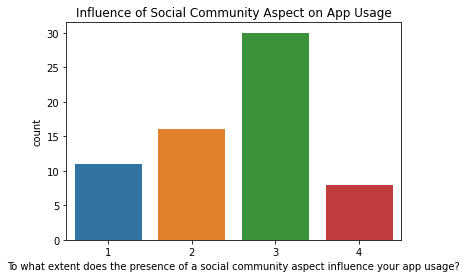

In [5]:
sns.countplot(data=data, x='To what extent does the presence of a social community aspect influence your app usage?')
plt.title('Influence of Social Community Aspect on App Usage')
plt.show()

Correlation Analysis

In [11]:
data['Social Community Influence'] = data['To what extent does the presence of a social community aspect influence your app usage?'].astype('category').cat.codes
data['Group Challenge Participation'] = data['What features would make you more likely to participate in community events or challenges within the app?'].astype('category').cat.codes

# Calculate the correlation matrix
peer_corr = data[['Social Community Influence', 'Group Challenge Participation']].corr()

# Display the correlation matrix
print(peer_corr)

                               Social Community Influence  \
Social Community Influence                        1.00000   
Group Challenge Participation                     0.10276   

                               Group Challenge Participation  
Social Community Influence                           0.10276  
Group Challenge Participation                        1.00000  


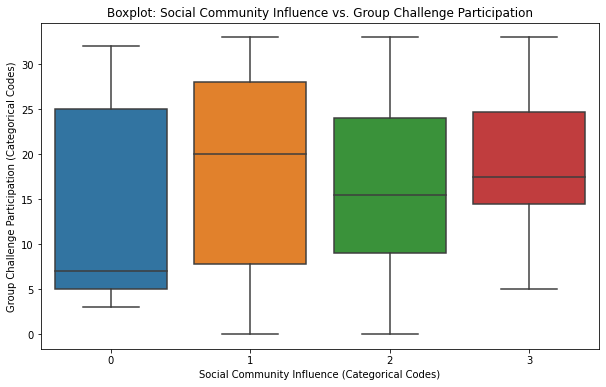

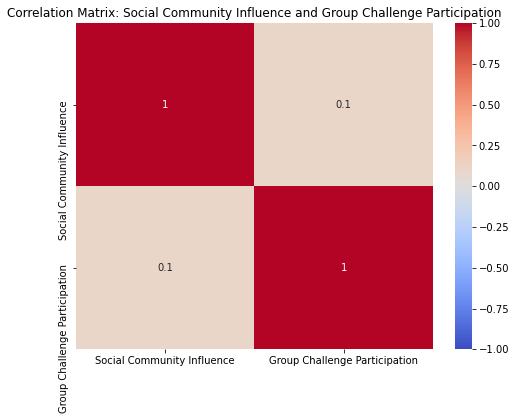

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Social Community Influence'], y=data['Group Challenge Participation'])
plt.title('Boxplot: Social Community Influence vs. Group Challenge Participation')
plt.xlabel('Social Community Influence (Categorical Codes)')
plt.ylabel('Group Challenge Participation (Categorical Codes)')
plt.show()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(peer_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Social Community Influence and Group Challenge Participation')
plt.show()

Weak Positive Correlation between Social Community Aspect and Community Events or Challenges

# 2. Family Dynamics Analysis

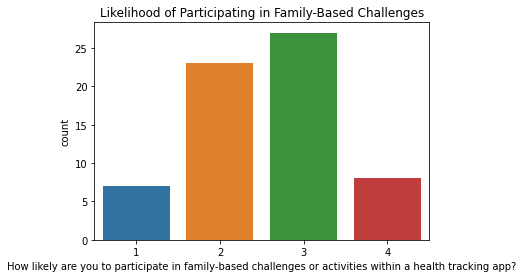

In [42]:
# Distribution Analysis for Family-Based Challenges
sns.countplot(data=data, x='How likely are you to participate in family-based challenges or activities within a health tracking app?')
plt.title('Likelihood of Participating in Family-Based Challenges')
plt.show()

##### - Most respondents are somewhat to likely interested in participating in family-based challenges (Ratings 2 and 3).
##### - There is a moderate level of interest across the board, with fewer respondents being either highly unlikely or very likely to participate.
##### - This suggests that while family-based challenges are generally appealing, there may be room to increase engagement by targeting those who are less inclined (Rating 1) and converting them into more active participants.

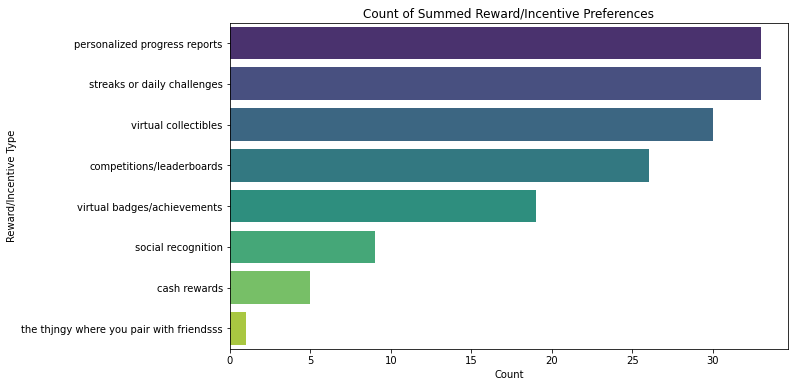

In [47]:
# Mapping of individual components to a standardized category
response_mapping = {
    'streaks or daily challenges': 'streaks or daily challenges',
    'virtual collectibles (eg: in-app cards that can be traded with friends)': 'virtual collectibles',
    'competitions/leaderboard rankings': 'competitions/leaderboards',
    'personalised progress reports and recommendations': 'personalized progress reports',
    'virtual badges/achievements': 'virtual badges/achievements',
    'social recognition or shout-outs': 'social recognition',
    'cash voucher': 'cash rewards',
    'money': 'cash rewards',
    'money hehe': 'cash rewards',
    'money/vouchers': 'cash rewards',
    'food and cash rewards': 'cash rewards',
}

def map_response(response):
    if pd.isna(response):
        return []
    # Split the response into individual components
    components = [r.strip().lower() for r in response.split(';')]
    # Map each component to the standardized category
    mapped_components = [response_mapping.get(comp, comp) for comp in components]
    return mapped_components

# Apply the mapping function and flatten the list of responses
all_mapped_responses = []
for response in new_data_exploded_cleaned:
    all_mapped_responses.extend(map_response(response))

response_series = pd.Series(all_mapped_responses)

# Count the occurrences of each standardized and mapped reward or incentive
summed_reward_counts = response_series.value_counts()

# Plot the bar chart with the summed data
plt.figure(figsize=(10, 6))
sns.barplot(x=summed_reward_counts.values, y=summed_reward_counts.index, palette='viridis')
plt.title('Count of Summed Reward/Incentive Preferences')
plt.xlabel('Count')
plt.ylabel('Reward/Incentive Type')
plt.show()


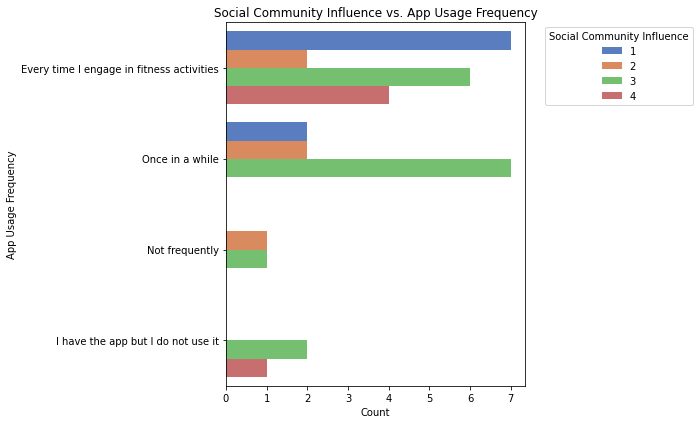

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example: Group the data by 'Social Community Influence' and 'App Usage Frequency' and count the occurrences
data_grouped = data.groupby(['To what extent does the presence of a social community aspect influence your app usage?',
                             'How often do you use health tracking apps to track your physical activities/habits?']).size().reset_index(name='Count')

# Create a barplot (horizontal)
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='How often do you use health tracking apps to track your physical activities/habits?',
            hue='To what extent does the presence of a social community aspect influence your app usage?',
            data=data_grouped, palette='muted')

plt.title('Social Community Influence vs. App Usage Frequency')
plt.xlabel('Count')
plt.ylabel('App Usage Frequency')
plt.legend(title='Social Community Influence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### - Users who report that social community aspects influence them moderately to strongly (higher x-axis values) are more likely to use the app more frequently ("Every time I engage in fitness activities").
##### - Those who say social community aspects have minimal influence on them tend to use the app less frequently, with some using it only "Once in a while" or "Not frequently."
##### - There is some variation in responses, indicating that while social community influence generally correlates with more frequent app usage, there are exceptions.

##### - Friends Participating and Rewards or Incentives are likely to be universally appealing across the user base. Ensuring these features are emphasized in the app can lead to broader engagement.
##### - Monetary Rewards and Interesting Activities may appeal more strongly to specific segments of users. Identifying these groups and tailoring communication or feature availability to them could maximize engagement within those segments.

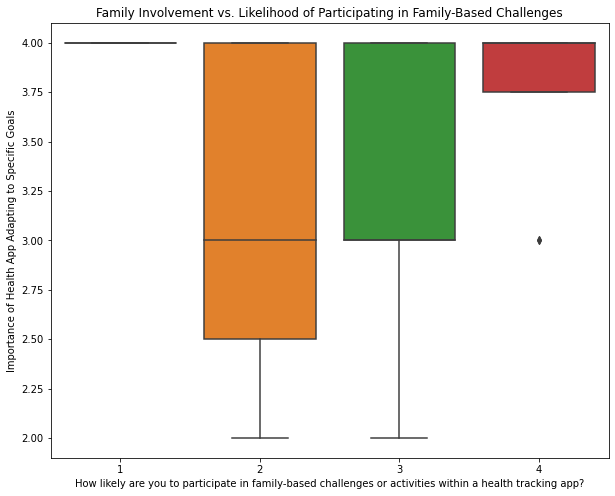

In [57]:
plt.figure(figsize=(10, 8))

# Create the boxplot with adjusted axis labels
sns.boxplot(x='How likely are you to participate in family-based challenges or activities within a health tracking app?',
            y='How important is it for you that a health tracking app adapts its recommendations and content to align with your specific health goals and activity data?',
            data=data)


# Shorten the y-axis label and add title
plt.ylabel('Importance of Health App Adapting to Specific Goals')
plt.title('Family Involvement vs. Likelihood of Participating in Family-Based Challenges')
plt.show()


##### - Positive Correlation: There seems to be a positive relationship between the likelihood of participating in family-based challenges and the importance placed on the app's ability to adapt to specific health goals. As the likelihood to participate increases, so does the importance of app adaptability.

##### - Insight for Development: For users who are more likely to engage in family-based challenges, ensuring that the app offers personalized and adaptable content could be key to maintaining their engagement.

##### - Strategic Focus: The results suggest that focusing on enhancing the adaptability of the app to individual health goals could increase engagement, especially among those already inclined to participate in family-based activities.

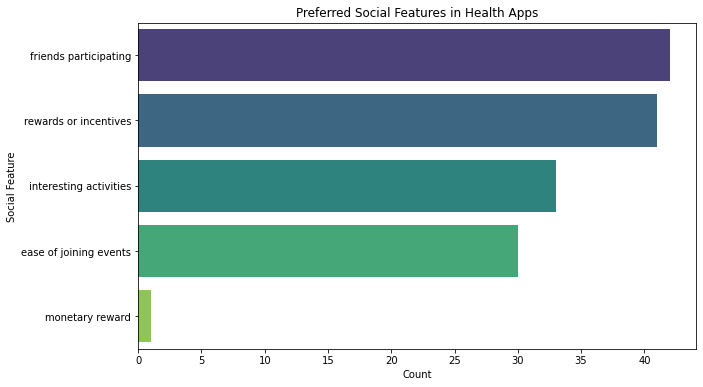

In [58]:
def split_and_map_features(features):
    if pd.isna(features):
        return []
    feature_list = [f.strip().lower() for f in features.split(';')]
    return feature_list

# Apply the function to break down and aggregate the features
aggregated_features = data['What features would make you more likely to participate in community events or challenges within the app?'].apply(split_and_map_features)

# Flatten the list of features
flattened_features = [feature for sublist in aggregated_features for feature in sublist]

# Convert to DataFrame to count occurrences
feature_counts = pd.Series(flattened_features).value_counts()

# Plot the simplified bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.values, y=feature_counts.index, palette='viridis')
plt.title('Preferred Social Features in Health Apps')
plt.xlabel('Count')
plt.ylabel('Social Feature')
plt.show()

##### - Social Interaction: The top feature, "Friends participating," emphasizes the importance of social interaction in driving engagement in health apps.
##### - Tangible Rewards: "Rewards or incentives" and "Monetary reward" highlight that recognition and financial incentives are also important but secondary to social features.
##### -Ease and Interest: "Ease of joining events" and "Interesting activities" suggest that the app's content and usability are also crucial factors in user engagement.


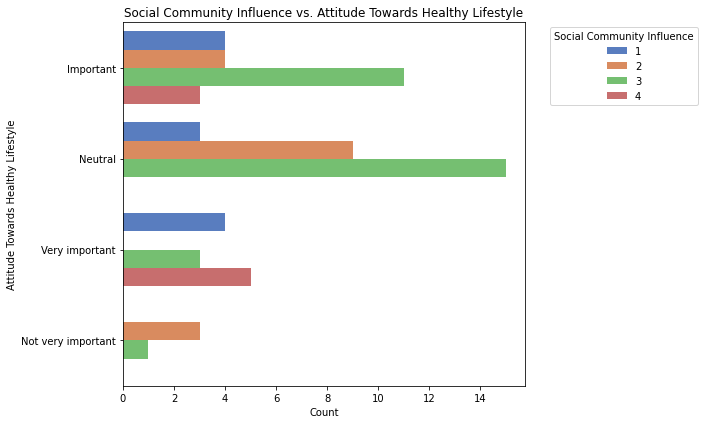

In [15]:
# Correlate social influence with motivation to maintain a healthy lifestyle

data_grouped = data.groupby(['To what extent does the presence of a social community aspect influence your app usage?',
                             'How would you describe your attitude towards maintaining a healthy lifestyle?']).size().reset_index(name='Count')

# Create a barplot (horizontal)
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='How would you describe your attitude towards maintaining a healthy lifestyle?',
            hue='To what extent does the presence of a social community aspect influence your app usage?',
            data=data_grouped, palette='muted')

plt.title('Social Community Influence vs. Attitude Towards Healthy Lifestyle')
plt.xlabel('Count')
plt.ylabel('Attitude Towards Healthy Lifestyle')
plt.legend(title='Social Community Influence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### - Positive Correlation: There is a positive correlation between the importance placed on maintaining a healthy lifestyle and the influence of social community aspects. Those who find a healthy lifestyle very important are also more influenced by social community aspects in health apps.
##### - Strategic Implication: To engage users who are highly motivated to maintain a healthy lifestyle, emphasizing social community features in the app could enhance engagement. Conversely, those who are less motivated by health concerns might not be as influenced by social community features.

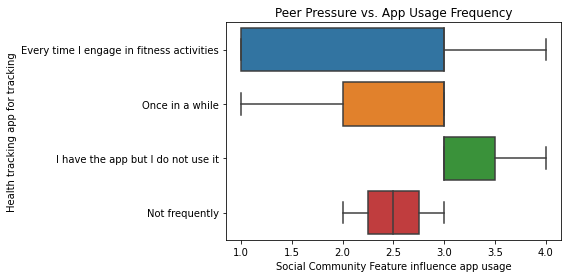

In [64]:
# Correlate peer pressure (social community influence) with app usage frequency
sns.boxplot(x='To what extent does the presence of a social community aspect influence your app usage?',
            y='How often do you use health tracking apps to track your physical activities/habits?',
            data=data)
plt.xlabel('Social Community Feature influence app usage')
plt.ylabel('Health tracking app for tracking')
plt.title('Peer Pressure vs. App Usage Frequency')
plt.show()


Every Time I Engage in Fitness Activities (Blue Box):
Respondents who use the app every time they engage in fitness activities tend to be influenced by social community aspects, with a range mostly around 3 to 4 on the x-axis.
This indicates that those who are most frequent in their app usage also tend to be more influenced by peer pressure or the presence of a social community in the app.
Once in a While (Orange Box):

The "Once in a while" group also shows a moderate level of social influence, with values clustering around 2.5 to 3.5.
This suggests that while these users are influenced by social aspects, the influence is slightly less than that of the most frequent users.
I Have the App but Do Not Use It (Green Box):

Respondents in this group show a more varied range of social influence, with values typically around 2.5 to 3.
This suggests that even those who do not frequently use the app might still be somewhat influenced by social community aspects, though not enough to drive regular app usage.
Not Frequently (Red Box):

Respondents who rarely use the app tend to cluster around 2.5 on the x-axis, indicating minimal to moderate social influence.
This group appears to be less
##### - Positive Correlation: There is a general positive correlation between social community influence and app usage frequency. Those who are more frequently influenced by social aspects tend to use the app more often.
##### - Strategic Insight: Enhancing social community features (e.g., group challenges, friend activity sharing) could be a key strategy for increasing app engagement, particularly among users who already show some level of social influence.
##### - Engagement Opportunities: Users who are moderately influenced by social aspects but do not use the app frequently (like the "Once in a while" group) could potentially be targeted with social-driven engagement strategies to increase their usage frequency.

Key Observations:
Every Time I Engage in Fitness Activities (Top Blue Box):

The majority of respondents who use the app every time they engage in fitness activities report a high level of social community influence (around 2.5 to 3).
This suggests that those who are most consistent in using the app are heavily influenced by social factors, such as peer participation or community features.
Once in a While (Orange Box):

This group shows a moderate level of social community influence, with a range of 1.5 to 2.5.
While social influence is still important to this group, it appears to be less of a factor compared to the most frequent users.
I Have the App but Do Not Use It (Green Box):

Respondents who have the app but rarely use it show a moderate social influence (around 2).
This suggests that while they are somewhat influenced by social aspects, it is not enough to drive frequent app usage.
Not Frequently (Red Box):

This group shows low to minimal social community influence (around 1.5).
These respondents are less influenced by social factors, which correlates with their infrequent app usage.

##### - Positive Correlation: There is a positive correlation between social community influence and app usage frequency. Users who frequently use the app are more likely to be influenced by social factors, such as peer pressure or community involvement.
##### - Strategic Insight: Enhancing social community features in the app could potentially increase engagement, particularly among users who already exhibit some level of social influence. For those who are less influenced by social factors, alternative strategies might be necessary to increase their engagement.
##### - Focus on Social Features: Given that higher social community influence correlates with higher app usage, developers and marketers might focus on enhancing features like friend activity sharing, group challenges, and community events to boost overall app engagement.

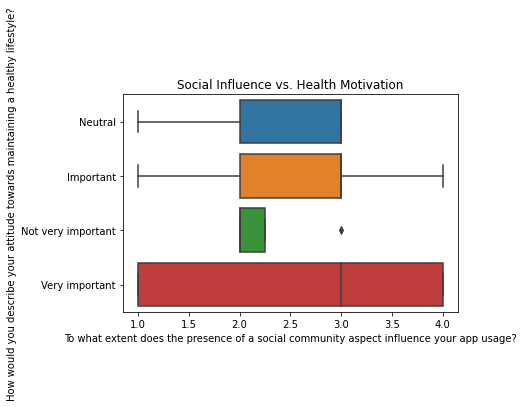

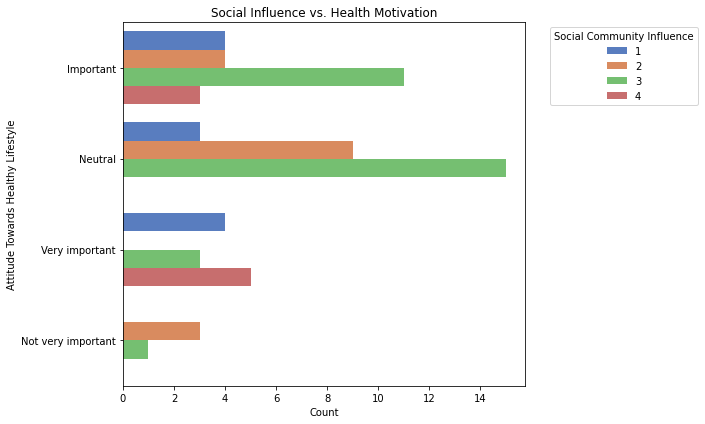

In [28]:
# Correlate social influence with motivation to maintain a healthy lifestyle
sns.boxplot(x='To what extent does the presence of a social community aspect influence your app usage?',
            y='How would you describe your attitude towards maintaining a healthy lifestyle?',
            data=data)
plt.title('Social Influence vs. Health Motivation')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'Social Community Influence' and 'Attitude Towards Healthy Lifestyle' and count the occurrences
data_grouped = data.groupby(['To what extent does the presence of a social community aspect influence your app usage?',
                             'How would you describe your attitude towards maintaining a healthy lifestyle?']).size().reset_index(name='Count')

# Create a barplot (horizontal)
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='How would you describe your attitude towards maintaining a healthy lifestyle?',
            hue='To what extent does the presence of a social community aspect influence your app usage?',
            data=data_grouped, palette='muted')

plt.title('Social Influence vs. Health Motivation')
plt.xlabel('Count')
plt.ylabel('Attitude Towards Healthy Lifestyle')
plt.legend(title='Social Community Influence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Key Observations:
Very Important (Bottom Red Box):

Respondents who consider maintaining a healthy lifestyle as "Very important" generally report a higher level of social community influence (around 2 to 3 on the x-axis).
This indicates that those who prioritize a healthy lifestyle are more likely to be influenced by social factors, such as peer encouragement or participation in a community.
Important (Orange Box):

This group shows a slightly lower level of social community influence, with values clustering around 1.5 to 2.
While social influence is still significant, it is less strong compared to the "Very important" group.
Neutral (Blue Box):

Respondents who are neutral towards maintaining a healthy lifestyle exhibit a wider range of social community influence, from 0 to 2.5.
This suggests that social influence plays a moderate role for this group, but it is not as decisive as it is for those who find health motivation more important.
Not Very Important (Green Box):

The few respondents who consider maintaining a healthy lifestyle as "Not very important" show minimal social influence, with values around 1.5.
This indicates that social community aspects have little effect on their motivation, which correlates with their lower priority on health.

##### - Positive Correlation: There is a positive correlation between the importance placed on maintaining a healthy lifestyle and the influence of social community aspects. Those who find health motivation very important are more likely to be influenced by social factors.
##### - Strategic Insight: To engage users who highly prioritize their health, emphasizing social community features in health apps could enhance their motivation and engagement. For users with lower health motivation, alternative strategies may be necessary to increase their involvement.

## Conclusion
The summarized findings reveal a recurring theme: social community aspects are pivotal in driving engagement in health tracking apps, especially among users who prioritize maintaining a healthy lifestyle. Across various summaries, there is a consistent positive correlation between the importance users place on health and the influence of social community features on their app usage.

1. Social Community Influence as a Major Driver
Across multiple summaries, the data shows that users who place high importance on maintaining a healthy lifestyle are more likely to be influenced by social factors. This group consistently exhibits higher app usage, particularly when social community features such as friend activity sharing, group challenges, and community events are present. The influence of social factors is evident in both frequent app usage and user engagement with health-related content.
Strategic Insight: For developers and marketers, enhancing social features within health apps should be a priority. These features are particularly effective at engaging users who already have a strong commitment to health. However, for users who are less motivated by social factors, alternative engagement strategies, such as personalized content or tangible rewards, might be necessary.

2. Positive Correlation Between Health Motivation and Social Influence
Users who find health motivation very important are not only more likely to be influenced by social factors but also more consistent in their app usage. This is seen across summaries that highlight how health-conscious users are significantly impacted by social community aspects. On the other hand, users with lower health motivation show less engagement with social features, indicating that these features alone might not be sufficient to boost their involvement.
Strategic Insight: Emphasizing social community features in health apps can enhance motivation and engagement, particularly for users who highly prioritize their health. For those with lower health motivation, integrating features that cater to individual needs, such as personalized goals and rewards, may be more effective in increasing their app usage.

3. Engagement Opportunities Through Family-Based Challenges
Family-based challenges are generally appealing to users, with a moderate level of interest across different segments. Users who already value health tend to engage more with these challenges, especially when the app is adaptable to their specific health goals. However, there is also potential to engage users with lower health motivation through targeted family-based activities.
Strategic Focus: The adaptability of the app to individual health goals and the inclusion of family-based challenges can significantly increase user engagement. This is especially true for users who are already inclined towards health-conscious behaviors. To broaden the appeal, targeting users who are less inclined to participate in these challenges and converting them into more active participants could be an effective strategy.

4. Importance of Social Interaction and Usability
Social interaction emerges as a top feature driving engagement, with "Friends participating" being the most influential. However, tangible rewards and the app's ease of use also play crucial roles in user engagement. These factors suggest that while social features are important, they need to be complemented by a user-friendly interface and rewarding experiences to maximize engagement.
Strategic Insight: Health apps should not only focus on enhancing social features but also ensure that the app's content is engaging and easy to interact with. This includes incorporating rewards, making events easy to join, and offering interesting activities that align with user interests.


The analysis underscores the central role of social community features in driving engagement among health-conscious users. However, to effectively engage a broader user base, health apps need to diversify their strategies by incorporating personalized content, tangible rewards, and user-friendly interfaces. Family-based challenges and school-based promotions also present valuable opportunities for increasing engagement, particularly among users with lower initial motivation. By aligning app features with the diverse needs and motivations of different user segments, developers can create more effective and engaging health apps that cater to a wide range of users.